In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from faker.providers.credit_card import Provider as CreditCardProvider
import datetime
import re

In [2]:
url = "https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv"
df = pd.read_csv(url, sep=";")
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


### Task 1.1
**Identify 5 unique features from this data set**

1. 
2. 
3. 
4.
5.

#### Clean and convert

Fjerner ugyldig tid

In [3]:
df = df[df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] < '24:00:00']
df = df[df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'] < '24:00:00']
df = df[df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'] < '24:00:00']
df = df[df['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'] < '24:00:00']

Konverterer tid

In [4]:
df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] = pd.to_timedelta(df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'])
df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'] = pd.to_timedelta(df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'])
df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'] = pd.to_timedelta(df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'])
df['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'] = pd.to_timedelta(df['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'])

#### Feature 1: Beregne ankomst tidsforsinkelser

In [5]:
df['Ankomst_tidsforsinkelse'] = df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] - df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra']

# Checks if there is no delay
for index, row in df.iterrows():
    if(row['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] < row['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra']):
        df.loc[index, 'Ankomst_tidsforsinkelse'] = 0

# Convert to time
df['Ankomst_tidsforsinkelse'] = pd.to_timedelta(df['Ankomst_tidsforsinkelse'])
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Ankomst_tidsforsinkelse
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,0 days 10:53:53,0 days 10:53:59,0 days 10:53:00,0 days 10:53:00,112,5,0 days 00:00:53
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,0 days 13:12:20,0 days 13:12:26,0 days 13:12:00,0 days 13:12:00,112,5,0 days 00:00:20
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,0 days 10:18:56,0 days 10:19:21,0 days 10:19:00,0 days 10:19:00,112,6,0 days 00:00:00
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,0 days 13:52:04,0 days 13:52:26,0 days 13:51:00,0 days 13:51:00,112,10,0 days 00:01:04
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,0 days 07:34:13,0 days 07:34:53,0 days 07:33:00,0 days 07:33:00,112,10,0 days 00:01:13


#### Feature 2: Beregne avgang tidsforsinkelser

In [6]:
df['Avgang_tidsforsinkelse'] = df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'] - df['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra']

# Checks if there is no delay
for index, row in df.iterrows():
    if(row['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'] < row['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra']):
        df.loc[index, 'Avgang_tidsforsinkelse'] = 0

# Convert to time
df['Avgang_tidsforsinkelse'] = pd.to_timedelta(df['Avgang_tidsforsinkelse'])
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Ankomst_tidsforsinkelse,Avgang_tidsforsinkelse
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,0 days 10:53:53,0 days 10:53:59,0 days 10:53:00,0 days 10:53:00,112,5,0 days 00:00:53,0 days 00:00:59
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,0 days 13:12:20,0 days 13:12:26,0 days 13:12:00,0 days 13:12:00,112,5,0 days 00:00:20,0 days 00:00:26
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,0 days 10:18:56,0 days 10:19:21,0 days 10:19:00,0 days 10:19:00,112,6,0 days 00:00:00,0 days 00:00:21
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,0 days 13:52:04,0 days 13:52:26,0 days 13:51:00,0 days 13:51:00,112,10,0 days 00:01:04,0 days 00:01:26
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,0 days 07:34:13,0 days 07:34:53,0 days 07:33:00,0 days 07:33:00,112,10,0 days 00:01:13,0 days 00:01:53


#### Feature 3: Bool er forsinket

In [7]:
for index, row in df.iterrows():
    if(row['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] < row['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra']):
        df.loc[index, 'er_forsinket_Ankomst'] = False
    else:
        df.loc[index, 'er_forsinket_Ankomst'] = True
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Ankomst_tidsforsinkelse,Avgang_tidsforsinkelse,er_forsinket_Ankomst
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,0 days 10:53:53,0 days 10:53:59,0 days 10:53:00,0 days 10:53:00,112,5,0 days 00:00:53,0 days 00:00:59,True
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,0 days 13:12:20,0 days 13:12:26,0 days 13:12:00,0 days 13:12:00,112,5,0 days 00:00:20,0 days 00:00:26,True
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,0 days 10:18:56,0 days 10:19:21,0 days 10:19:00,0 days 10:19:00,112,6,0 days 00:00:00,0 days 00:00:21,False
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,0 days 13:52:04,0 days 13:52:26,0 days 13:51:00,0 days 13:51:00,112,10,0 days 00:01:04,0 days 00:01:26,True
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,0 days 07:34:13,0 days 07:34:53,0 days 07:33:00,0 days 07:33:00,112,10,0 days 00:01:13,0 days 00:01:53,True


 ### Checking for outliers and cleaning the data:

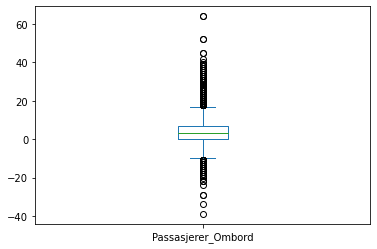

In [8]:
#Looking for outlaiers: (using a box plot)
df['Passasjerer_Ombord'].plot.box()

#The Negative values are outliers, and we need to remove them or replace them with resonable values (median). 
#Changing negativ values:
median_passasjerer_ombord = df['Passasjerer_Ombord'].median()
for index, row in df.iterrows():
    if row['Passasjerer_Ombord'] < 0:
        df.loc[index,'Passasjerer_Ombord'] =  median_passasjerer_ombord
        

mest passasjerer_ombord 64
størst kjøretøy 151
minst kjøretøy 33


,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Ankomst_tidsforsinkelse,Avgang_tidsforsinkelse,er_forsinket_Ankomst
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,0 days 10:53:53,0 days 10:53:59,0 days 10:53:00,0 days 10:53:00,112,5,0 days 00:00:53,0 days 00:00:59,True
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,0 days 13:12:20,0 days 13:12:26,0 days 13:12:00,0 days 13:12:00,112,5,0 days 00:00:20,0 days 00:00:26,True
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,0 days 10:18:56,0 days 10:19:21,0 days 10:19:00,0 days 10:19:00,112,6,0 days 00:00:00,0 days 00:00:21,False
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,0 days 13:52:04,0 days 13:52:26,0 days 13:51:00,0 days 13:51:00,112,10,0 days 00:01:04,0 days 00:01:26,True
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,0 days 07:34:13,0 days 07:34:53,0 days 07:33:00,0 days 07:33:00,112,10,0 days 00:01:13,0 days 00:01:53,True
5,3110-2020-08-01T16:16:00+02:00,01/08/2020,Oslo,Nordøst,Bjerke,Veitvet (mot Kalbakken),Rødtvet (mot Kalbakken),Lokal,Oslo,31,0,0 days 17:22:56,0 days 17:23:23,0 days 17:16:00,0 days 17:16:00,151,8,0 days 00:06:56,0 days 00:07:23,True
6,15010-2020-07-28T13:09:00+02:00,28/07/2020,Viken,Vest,Bærum,Nedre Toppenhaug,Øvre Toppenhaug,Lokal,Viken,150,0,0 days 13:19:00,0 days 13:19:05,0 days 13:17:00,0 days 13:17:00,112,1,0 days 00:02:00,0 days 00:02:05,True
7,15003-2020-07-27T06:18:00+02:00,27/07/2020,Oslo,Indre By,St.Hanshaugen,Hammersborggata (ved Storgata retning vest),St. Olavs plass (mot Frederiks gate),Lokal,Viken,150,1,0 days 06:20:24,0 days 06:20:29,0 days 06:20:00,0 days 06:20:00,112,3,0 days 00:00:24,0 days 00:00:29,True
8,21002-2020-08-16T14:33:00+02:00,16/08/2020,Viken,Vest,Bærum,Stein gård,Knabberudveien,Lokal,Viken,150,1,0 days 15:10:12,0 days 15:10:34,0 days 15:09:00,0 days 15:09:00,112,2,0 days 00:01:12,0 days 00:01:34,True
9,15002-2020-08-13T18:09:00+02:00,13/08/2020,Viken,Vest,Bærum,Bekkestua bussterminal (Plattform C),Stabekk skole,Lokal,Viken,150,0,0 days 18:37:41,0 days 18:38:19,0 days 18:29:00,0 days 18:29:00,112,4,0 days 00:08:41,0 days 00:09:19,True


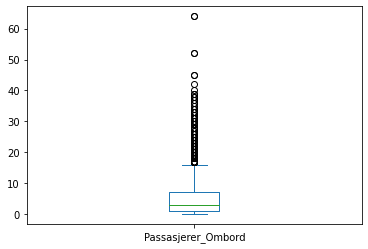

In [9]:
df['Passasjerer_Ombord'].plot.box()
#checking if the max_value in this column is bigger than the biggest capacity: 
print("mest passasjerer_ombord", df['Passasjerer_Ombord'].max()) #no
print("størst kjøretøy",df['Kjøretøy_Kapasitet'].max())
print("minst kjøretøy",df['Kjøretøy_Kapasitet'].min())
df.head(15)

#### Feature 4: Ledige plasser

In [10]:
df['Ledige_Plasser'] = df['Kjøretøy_Kapasitet'] - df['Passasjerer_Ombord']
df.head(10)

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,...,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Ankomst_tidsforsinkelse,Avgang_tidsforsinkelse,er_forsinket_Ankomst,Ledige_Plasser
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,...,0 days 10:53:53,0 days 10:53:59,0 days 10:53:00,0 days 10:53:00,112,5,0 days 00:00:53,0 days 00:00:59,True,107
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,...,0 days 13:12:20,0 days 13:12:26,0 days 13:12:00,0 days 13:12:00,112,5,0 days 00:00:20,0 days 00:00:26,True,107
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,...,0 days 10:18:56,0 days 10:19:21,0 days 10:19:00,0 days 10:19:00,112,6,0 days 00:00:00,0 days 00:00:21,False,106
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,...,0 days 13:52:04,0 days 13:52:26,0 days 13:51:00,0 days 13:51:00,112,10,0 days 00:01:04,0 days 00:01:26,True,102
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,...,0 days 07:34:13,0 days 07:34:53,0 days 07:33:00,0 days 07:33:00,112,10,0 days 00:01:13,0 days 00:01:53,True,102
5,3110-2020-08-01T16:16:00+02:00,01/08/2020,Oslo,Nordøst,Bjerke,Veitvet (mot Kalbakken),Rødtvet (mot Kalbakken),Lokal,Oslo,31,...,0 days 17:22:56,0 days 17:23:23,0 days 17:16:00,0 days 17:16:00,151,8,0 days 00:06:56,0 days 00:07:23,True,143
6,15010-2020-07-28T13:09:00+02:00,28/07/2020,Viken,Vest,Bærum,Nedre Toppenhaug,Øvre Toppenhaug,Lokal,Viken,150,...,0 days 13:19:00,0 days 13:19:05,0 days 13:17:00,0 days 13:17:00,112,1,0 days 00:02:00,0 days 00:02:05,True,111
7,15003-2020-07-27T06:18:00+02:00,27/07/2020,Oslo,Indre By,St.Hanshaugen,Hammersborggata (ved Storgata retning vest),St. Olavs plass (mot Frederiks gate),Lokal,Viken,150,...,0 days 06:20:24,0 days 06:20:29,0 days 06:20:00,0 days 06:20:00,112,3,0 days 00:00:24,0 days 00:00:29,True,109
8,21002-2020-08-16T14:33:00+02:00,16/08/2020,Viken,Vest,Bærum,Stein gård,Knabberudveien,Lokal,Viken,150,...,0 days 15:10:12,0 days 15:10:34,0 days 15:09:00,0 days 15:09:00,112,2,0 days 00:01:12,0 days 00:01:34,True,110
9,15002-2020-08-13T18:09:00+02:00,13/08/2020,Viken,Vest,Bærum,Bekkestua bussterminal (Plattform C),Stabekk skole,Lokal,Viken,150,...,0 days 18:37:41,0 days 18:38:19,0 days 18:29:00,0 days 18:29:00,112,4,0 days 00:08:41,0 days 00:09:19,True,108


#### Feature 5: Travelt nivå

In [11]:
df["Travelt_Nivå"] = pd.qcut(df.Ledige_Plasser, q=3, labels=["Lite plass","Midum","God plass"])
df.head(15)

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,...,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Ankomst_tidsforsinkelse,Avgang_tidsforsinkelse,er_forsinket_Ankomst,Ledige_Plasser,Travelt_Nivå
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,...,0 days 10:53:59,0 days 10:53:00,0 days 10:53:00,112,5,0 days 00:00:53,0 days 00:00:59,True,107,God plass
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,...,0 days 13:12:26,0 days 13:12:00,0 days 13:12:00,112,5,0 days 00:00:20,0 days 00:00:26,True,107,God plass
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,...,0 days 10:19:21,0 days 10:19:00,0 days 10:19:00,112,6,0 days 00:00:00,0 days 00:00:21,False,106,Midum
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,...,0 days 13:52:26,0 days 13:51:00,0 days 13:51:00,112,10,0 days 00:01:04,0 days 00:01:26,True,102,Midum
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,...,0 days 07:34:53,0 days 07:33:00,0 days 07:33:00,112,10,0 days 00:01:13,0 days 00:01:53,True,102,Midum
5,3110-2020-08-01T16:16:00+02:00,01/08/2020,Oslo,Nordøst,Bjerke,Veitvet (mot Kalbakken),Rødtvet (mot Kalbakken),Lokal,Oslo,31,...,0 days 17:23:23,0 days 17:16:00,0 days 17:16:00,151,8,0 days 00:06:56,0 days 00:07:23,True,143,God plass
6,15010-2020-07-28T13:09:00+02:00,28/07/2020,Viken,Vest,Bærum,Nedre Toppenhaug,Øvre Toppenhaug,Lokal,Viken,150,...,0 days 13:19:05,0 days 13:17:00,0 days 13:17:00,112,1,0 days 00:02:00,0 days 00:02:05,True,111,God plass
7,15003-2020-07-27T06:18:00+02:00,27/07/2020,Oslo,Indre By,St.Hanshaugen,Hammersborggata (ved Storgata retning vest),St. Olavs plass (mot Frederiks gate),Lokal,Viken,150,...,0 days 06:20:29,0 days 06:20:00,0 days 06:20:00,112,3,0 days 00:00:24,0 days 00:00:29,True,109,God plass
8,21002-2020-08-16T14:33:00+02:00,16/08/2020,Viken,Vest,Bærum,Stein gård,Knabberudveien,Lokal,Viken,150,...,0 days 15:10:34,0 days 15:09:00,0 days 15:09:00,112,2,0 days 00:01:12,0 days 00:01:34,True,110,God plass
9,15002-2020-08-13T18:09:00+02:00,13/08/2020,Viken,Vest,Bærum,Bekkestua bussterminal (Plattform C),Stabekk skole,Lokal,Viken,150,...,0 days 18:38:19,0 days 18:29:00,0 days 18:29:00,112,4,0 days 00:08:41,0 days 00:09:19,True,108,God plass


#### Plot 1: sum av passasjerer per time

In [29]:
# Lager en 2d numpy array som består av time og sum av passasjerer i denne timen

# summer passasjerer fra samme klokke og legge i en array: 
df_psngr_cts_pr_hour = df.resample('H', on='Tidspunkt_Faktisk_Avgang_Holdeplass_Fra', offset='0Min0s').Passasjerer_Ombord.sum().to_frame()
df_psngr_cts_pr_hour
#df_psngr_cts_pr_hour.plot.bar(x="Tidspunkt_Faktisk_Avgang_Holdeplass_Fra", y="Passasjerer_Ombord", rot=0)


,Passasjerer_Ombord
Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,
0 days 00:39:47,11
0 days 01:39:47,0
0 days 02:39:47,0
0 days 03:39:47,38
0 days 04:39:47,150
0 days 05:39:47,872
0 days 06:39:47,1678
0 days 07:39:47,2508
0 days 08:39:47,1388


#### Plot 2: Sum av passasjerer per linjenavn

<AxesSubplot:xlabel='Linjenavn'>

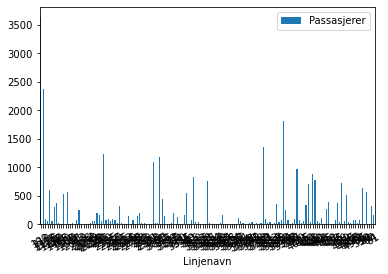

In [39]:
# Get a list of all uniqe "linjenavn": 
linjenavn = np.unique(df['Linjenavn'])
sum_of_psngrs = []

for i in linjenavn:
    s = df.loc[df['Linjenavn'] == i, 'Passasjerer_Ombord'].sum()
    sum_of_psngrs.append(s)

df_psngr_cts_pr_line = pd.DataFrame({"Linjenavn": linjenavn, "Passasjerer": sum_of_psngrs})
#df_psngr_cts_pr_line
df_psngr_cts_pr_line.plot.bar(x="Linjenavn", y="Passasjerer", rot=30)